<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第九章-树回归" data-toc-modified-id="第九章-树回归-1">第九章 树回归</a></span><ul class="toc-item"><li><span><a href="#树回归-概述" data-toc-modified-id="树回归-概述-1.1">树回归 概述</a></span></li><li><span><a href="#树回归-场景" data-toc-modified-id="树回归-场景-1.2">树回归 场景</a></span></li><li><span><a href="#树回归-算法特点" data-toc-modified-id="树回归-算法特点-1.3">树回归 算法特点</a></span></li><li><span><a href="#树回归-开发流程" data-toc-modified-id="树回归-开发流程-1.4">树回归 开发流程</a></span></li><li><span><a href="#树构建算法，函数-createTree()-伪代码大致如下:" data-toc-modified-id="树构建算法，函数-createTree()-伪代码大致如下:-1.5">树构建算法，函数 createTree() 伪代码大致如下:</a></span></li><li><span><a href="#找到数据集切分的最佳位置，函数-chooseBestSplit()-伪代码大致如下:" data-toc-modified-id="找到数据集切分的最佳位置，函数-chooseBestSplit()-伪代码大致如下:-1.6">找到数据集切分的最佳位置，函数 chooseBestSplit() 伪代码大致如下:</a></span></li><li><span><a href="#树剪枝" data-toc-modified-id="树剪枝-1.7">树剪枝</a></span><ul class="toc-item"><li><span><a href="#预剪枝(prepruning)" data-toc-modified-id="预剪枝(prepruning)-1.7.1">预剪枝(prepruning)</a></span></li><li><span><a href="#后剪枝(postpruning)" data-toc-modified-id="后剪枝(postpruning)-1.7.2">后剪枝(postpruning)</a></span></li><li><span><a href="#模型树" data-toc-modified-id="模型树-1.7.3">模型树</a></span><ul class="toc-item"><li><span><a href="#模型树-简介" data-toc-modified-id="模型树-简介-1.7.3.1">模型树 简介</a></span></li></ul></li></ul></li><li><span><a href="#树回归与标准回归的比较" data-toc-modified-id="树回归与标准回归的比较-1.8">树回归与标准回归的比较</a></span><ul class="toc-item"><li><span><a href="#项目概述" data-toc-modified-id="项目概述-1.8.1">项目概述</a></span></li></ul></li><li><span><a href="#附加-Python-中-GUI-的使用" data-toc-modified-id="附加-Python-中-GUI-的使用-1.9">附加 Python 中 GUI 的使用</a></span><ul class="toc-item"><li><span><a href="#使用-Python-的-Tkinter-库创建-GUI" data-toc-modified-id="使用-Python-的-Tkinter-库创建-GUI-1.9.1">使用 Python 的 Tkinter 库创建 GUI</a></span></li><li><span><a href="#用-Tkinter-创建-GUI" data-toc-modified-id="用-Tkinter-创建-GUI-1.9.2">用 Tkinter 创建 GUI</a></span></li><li><span><a href="#集成-Matplotlib-和-Tkinter" data-toc-modified-id="集成-Matplotlib-和-Tkinter-1.9.3">集成 Matplotlib 和 Tkinter</a></span></li><li><span><a href="#用treeExplore-的GUI构建的模型树示例图" data-toc-modified-id="用treeExplore-的GUI构建的模型树示例图-1.9.4">用treeExplore 的GUI构建的模型树示例图</a></span></li><li><span><a href="#这里简单介绍一下Tkinter：" data-toc-modified-id="这里简单介绍一下Tkinter：-1.9.5">这里简单介绍一下Tkinter：</a></span></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-1.10">总结</a></span></li></ul></li></ul></div>

# 第九章 树回归

**本章内容**
>CART算法      
回归与模型树   
树剪枝算法   
Python中GUI的使用   

## 树回归 概述
我们本章介绍 CART(Classification And Regression Trees， 分类回归树) 的树构建算法。该算法既可以用于分类还可以用于回归。

## 树回归 场景
我们在第 8 章中介绍了线性回归的一些强大的方法，但这些方法创建的模型需要拟合所有的样本点（局部加权线性回归除外）。当数据拥有众多特征并且特征之间关系十分复杂时，构建全局模型的想法就显得太难了，也略显笨拙。而且，实际生活中很多问题都是非线性的，不可能使用全局线性模型来拟合任何数据。

一种可行的方法是将数据集切分成很多份易建模的数据，然后利用我们的线性回归技术来建模。如果首次切分后仍然难以拟合线性模型就继续切分。在这种切分方式下，树回归和回归法就相当有用。

除了我们在 第3章 中介绍的 决策树算法，我们介绍一个新的叫做 CART(Classification And Regression Trees, 分类回归树) 的树构建算法。该算法既可以用于分类还可以用于回归。

## 树回归 算法特点
>优点：可以对复杂和非线性的数据建模。  
缺点：结果不易理解。  
适用数据类型：数值型和标称型数据。   


我们在 第3章 中使用的树构建算法是 ID3 。ID3 的做法是每次选取当前最佳的特征来分割数据，并按照该特征的所有可能取值来切分。也就是说，如果一个特征有 4 种取值，那么数据将被切分成 4 份。一旦按照某特征切分后，该特征在之后的算法执行过程中将不会再起作用，所以有观点认为这种切分方式过于迅速。另外一种方法是二分切分法，即每次把数据集切分成两份。如果数据的某特征值等于切分所要求的值，那么这些数据就进入树的左子树，反之则进入树的右子树。

除了切分过于迅速外， ID3 算法还存在另一个问题，它不能直接处理连续型特征。只有事先将连续型特征转换成离散型，才能在 ID3 算法中使用。但这种转换过程会破坏连续型变量的内在性质。而使用二元切分法则易于对树构造过程进行调整以处理连续型特征。具体的处理方法是: 如果特征值大于给定值就走左子树，否则就走右子树。另外，二分切分法也节省了树的构建时间，但这点意义也不是特别大，因为这些树构建一般是离线完成，时间并非需要重点关注的因素。

CART 是十分著名且广泛记载的树构建算法，它使用二元切分来处理连续型变量。对 CART 稍作修改就可以处理回归问题。第 3 章中使用香农熵来度量集合的无组织程度。如果选用其他方法来代替香农熵，就可以使用树构建算法来完成回归。

回归树与分类树的思路类似，但是叶节点的数据类型不是离散型，而是连续型。



## 树回归 开发流程
>(1) 收集数据：采用任意方法收集数据。   
(2) 准备数据：需要数值型数据，标称型数据应该映射成二值型数据。  
(3) 分析数据：绘出数据的二维可视化显示结果，以字典方式生成树。   
(4) 训练算法：大部分时间都花费在叶节点树模型的构建上。    
(5) 测试算法：使用测试数据上的$R^2$值来分析模型的效果。   
(6) 使用算法：使用训练处的树做预测，预测结果还可以用来做很多事情。   


## 树构建算法，函数 createTree() 伪代码大致如下:
```
找到最佳的待切分特征:
    如果该节点不能再分，将该节点存为叶节点
    执行二元切分
    在右子树调用 createTree() 方法
    在左子树调用 createTree() 方法 
```

## 找到数据集切分的最佳位置，函数 chooseBestSplit() 伪代码大致如下:
```
对每个特征:
    对每个特征值: 
        将数据集切分成两份（小于该特征值的数据样本放在左子树，否则放在右子树）
        计算切分的误差
        如果当前误差小于当前最小误差，那么将当前切分设定为最佳切分并更新最小误差
返回最佳切分的特征和阈值
```










In [1]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        # python3不适用：fltLine = map(float,curLine) 修改为：
        fltLine = list(map(float, curLine))#将每行映射成浮点数，python3返回值改变，所以需要
        dataMat.append(fltLine)
    return dataMat


def binSplitDataSet(dataSet, feature, value):
    """binSplitDataSet(将数据集，按照feature列的value进行 二元切分)
        Description：在给定特征和特征值的情况下，该函数通过数组过滤方式将上述数据集合切分得到两个子集并返回。
    Args:
        dataMat 数据集
        feature 待切分的特征列
        value 特征列要比较的值
    Returns:
        mat0 小于等于 value 的数据集在左边
        mat1 大于 value 的数据集在右边
    Raises:
    """
    # # 测试案例
    # print 'dataSet[:, feature]=', dataSet[:, feature]
    # print 'nonzero(dataSet[:, feature] > value)[0]=', nonzero(dataSet[:, feature] > value)[0]
    # print 'nonzero(dataSet[:, feature] <= value)[0]=', nonzero(dataSet[:, feature] <= value)[0]

    # dataSet[:, feature] 取去每一行中，第1列的值(从0开始算)
    # nonzero(dataSet[:, feature] > value)  返回结果为true行的index下标
    mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :]
    mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :]
    #下面原书代码报错 index 0 is out of bounds,使用上面两行代码
    #mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :][0]
    #mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :][0]
    return mat0, mat1

def regLeaf(dataSet):#returns the value used for each leaf
    return mean(dataSet[:,-1])

def regErr(dataSet):
    return var(dataSet[:,-1]) * shape(dataSet)[0]

# 1.用最佳方式切分数据集
# 2.生成相应的叶节点
def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    """chooseBestSplit(用最佳方式切分数据集 和 生成相应的叶节点)

    Args:
        dataSet   加载的原始数据集
        leafType  建立叶子点的函数
        errType   误差计算函数(求总方差)
        ops       [容许误差下降值，切分的最少样本数]。
    Returns:
        bestIndex feature的index坐标
        bestValue 切分的最优值
    Raises:
    """

    # ops=(1,4)，非常重要，因为它决定了决策树划分停止的threshold值，被称为预剪枝（prepruning），其实也就是用于控制函数的停止时机。
    # 之所以这样说，是因为它防止决策树的过拟合，所以当误差的下降值小于tolS，或划分后的集合size小于tolN时，选择停止继续划分。
    # 最小误差下降值，划分后的误差减小小于这个差值，就不用继续划分
    tolS = ops[0]
    # 划分最小 size 小于，就不继续划分了
    tolN = ops[1]
    # 如果结果集(最后一列为1个变量)，就返回退出
    # .T 对数据集进行转置
    # .tolist()[0] 转化为数组并取第0列
    if len(set(dataSet[:, -1].T.tolist()[0])) == 1: # 如果集合size为1，不用继续划分。
        #  exit cond 1
        return None, leafType(dataSet)
    # 计算行列值
    m, n = shape(dataSet)
    # 无分类误差的总方差和
    # the choice of the best feature is driven by Reduction in RSS error from mean
    S = errType(dataSet)
    # inf 正无穷大
    bestS, bestIndex, bestValue = inf, 0, 0
    # 循环处理每一列对应的feature值
    for featIndex in range(n-1): # 对于每个特征
        # [0]表示这一列的[所有行]，不要[0]就是一个array[[所有行]]
        # for splitVal in set(dataSet[:,featIndex]): python3报错修改为下面
        for splitVal in set((dataSet[:, featIndex].T.A.tolist())[0]):#遍历每个特征里不同的特征值
             # 对该列进行分组，然后组内的成员的val值进行 二元切分
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)
            # 判断二元切分的方式的元素数量是否符合预期
            if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN):
                continue
            newS = errType(mat0) + errType(mat1)
            # 如果二元切分，算出来的误差在可接受范围内，那么就记录切分点，并记录最小误差
            # 如果划分后误差小于 bestS，则说明找到了新的bestS
            if newS < bestS:
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    # 判断二元切分的方式的元素误差是否符合预期
    # if the decrease (S-bestS) is less than a threshold don't do the split
    if (S - bestS) < tolS:
        return None, leafType(dataSet)
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    # 对整体的成员进行判断，是否符合预期
    # 如果集合的 size 小于 tolN 
    if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN): # 当最佳划分后，集合过小，也不划分，产生叶节点
        return None, leafType(dataSet)
    return bestIndex, bestValue


# assume dataSet is NumPy Mat so we can array filtering
# 假设 dataSet 是 NumPy Mat 类型的，那么我们可以进行 array 过滤
def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    """createTree(获取回归树)
        Description：递归函数：如果构建的是回归树，该模型是一个常数，如果是模型树，其模型师一个线性方程。
    Args:
        dataSet      加载的原始数据集
        leafType     建立叶子点的函数
        errType      误差计算函数
        ops=(1, 4)   [容许误差下降值，切分的最少样本数]
    Returns:
        retTree    决策树最后的结果
    """
    # 选择最好的切分方式： feature索引值，最优切分值
    # choose the best split
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    # if the splitting hit a stop condition return val
    # 如果 splitting 达到一个停止条件，那么返回 val
    if feat is None:
        return val
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    # 大于在右边，小于在左边，分为2个数据集
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    # 递归的进行调用，在左右子树中继续递归生成树
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree

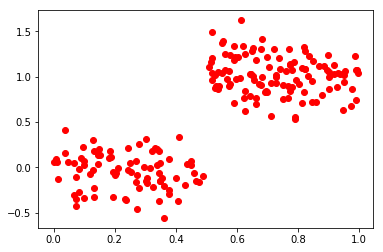

({'spInd': 0,
  'spVal': 0.48813,
  'left': 1.0180967672413792,
  'right': -0.04465028571428572},
 None)

In [3]:
myDat=loadDataSet("./input&code/Ch09/ex00.txt")
myMat=mat(myDat)
mM=createTree(myMat)
import matplotlib.pyplot as plt  
plt.plot(myMat[:,0],myMat[:,1],'ro') 
mM,plt.show()

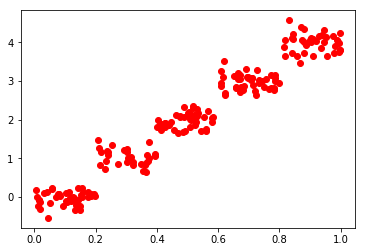

({'spInd': 1,
  'spVal': 0.39435,
  'left': {'spInd': 1,
   'spVal': 0.582002,
   'left': {'spInd': 1,
    'spVal': 0.797583,
    'left': 3.9871632,
    'right': 2.9836209534883724},
   'right': 1.980035071428571},
  'right': {'spInd': 1,
   'spVal': 0.197834,
   'left': 1.0289583666666666,
   'right': -0.023838155555555553}},
 None)

In [4]:
import matplotlib.pyplot as plt 
myDat1=loadDataSet('./input&code/Ch09/ex0.txt') 
myMat1=mat(myDat1) 
mM1=createTree(myMat1) 
plt.plot(myMat1[:,1],myMat1[:,2],'ro') 
mM1,plt.show()

## 树剪枝
一棵树如果节点过多，表明该模型可能对数据进行了 “过拟合”。

通过降低决策树的复杂度来避免过拟合的过程称为 剪枝（pruning）。在函数 chooseBestSplit() 中提前终止条件，实际上是在进行一种所谓的 预剪枝（prepruning）操作。另一个形式的剪枝需要使用测试集和训练集，称作 后剪枝（postpruning）。

### 预剪枝(prepruning)
顾名思义，预剪枝就是及早的停止树增长，在构造决策树的同时进行剪枝。

所有决策树的构建方法，都是在无法进一步降低熵的情况下才会停止创建分支的过程，为了避免过拟合，可以设定一个阈值，熵减小的数量小于这个阈值，即使还可以继续降低熵，也停止继续创建分支。但是这种方法实际中的效果并不好。


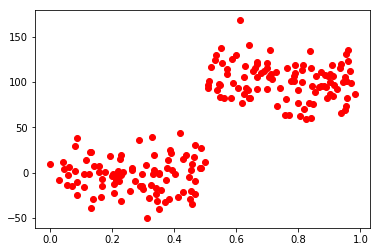

({'spInd': 0,
  'spVal': 0.499171,
  'left': {'spInd': 0,
   'spVal': 0.729397,
   'left': {'spInd': 0,
    'spVal': 0.952833,
    'left': {'spInd': 0,
     'spVal': 0.965969,
     'left': {'spInd': 0,
      'spVal': 0.968621,
      'left': 86.399637,
      'right': 98.648346},
     'right': {'spInd': 0,
      'spVal': 0.956951,
      'left': {'spInd': 0,
       'spVal': 0.958512,
       'left': {'spInd': 0,
        'spVal': 0.960398,
        'left': 112.386764,
        'right': 123.559747},
       'right': 135.837013},
      'right': {'spInd': 0,
       'spVal': 0.953902,
       'left': {'spInd': 0,
        'spVal': 0.954711,
        'left': 82.016541,
        'right': 100.935789},
       'right': 130.92648}}},
    'right': {'spInd': 0,
     'spVal': 0.759504,
     'left': {'spInd': 0,
      'spVal': 0.763328,
      'left': {'spInd': 0,
       'spVal': 0.769043,
       'left': {'spInd': 0,
        'spVal': 0.790312,
        'left': {'spInd': 0,
         'spVal': 0.806158,
         'le

In [6]:
myDat2=loadDataSet("./input&code/Ch09/ex2.txt")
myMat2=mat(myDat2)
mM2=createTree(myMat2,ops=(0,1))
import matplotlib.pyplot as plt  
plt.plot(myMat2[:,0],myMat2[:,1],'ro') 
mM2,plt.show()

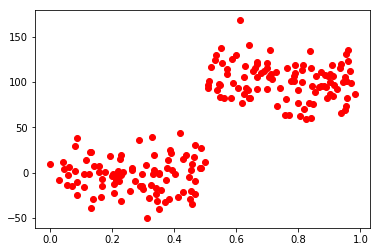

({'spInd': 0,
  'spVal': 0.499171,
  'left': 101.35815937735848,
  'right': -2.637719329787234},
 None)

In [7]:
myDat2=loadDataSet("./input&code/Ch09/ex2.txt")
myMat2=mat(myDat2)
mM2=createTree(myMat2,ops=(10000,4))
import matplotlib.pyplot as plt  
plt.plot(myMat2[:,0],myMat2[:,1],'ro') 
mM2,plt.show()


### 后剪枝(postpruning)
决策树构造完成后进行剪枝。剪枝的过程是对拥有同样父节点的一组节点进行检查，判断如果将其合并，熵的增加量是否小于某一阈值。如果确实小，则这一组节点可以合并一个节点，其中包含了所有可能的结果。合并也被称作 塌陷处理 ，在回归树中一般采用取需要合并的所有子树的平均值。后剪枝是目前最普遍的做法。

后剪枝 prune() 的伪代码如下:
```
基于已有的树切分测试数据:
    如果存在任一子集是一棵树，则在该子集递归剪枝过程
    计算将当前两个叶节点合并后的误差
    计算不合并的误差
    如果合并会降低误差的话，就将叶节点合并
```


In [8]:
#判断输入是否为一棵树
def isTree(obj):
    return (type(obj).__name__=='dict') #判断为字典类型返回true
#返回树的平均值
def getMean(tree):
    if isTree(tree['right']):
        tree['right'] = getMean(tree['right'])
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
    return (tree['left']+tree['right'])/2.0


#树的后剪枝
def prune(tree, testData):#待剪枝的树和剪枝所需的测试数据
    if shape(testData)[0] == 0: return getMean(tree)  # 确认数据集非空
    #假设发生过拟合，采用测试数据对树进行剪枝
    if (isTree(tree['right']) or isTree(tree['left'])): #左右子树非空
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
    if isTree(tree['left']): tree['left'] = prune(tree['left'], lSet)
    if isTree(tree['right']): tree['right'] = prune(tree['right'], rSet)
    #剪枝后判断是否还是有子树
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
        #判断是否merge
        errorNoMerge = sum(power(lSet[:, -1] - tree['left'], 2)) + \
                       sum(power(rSet[:, -1] - tree['right'], 2))
        treeMean = (tree['left'] + tree['right']) / 2.0
        errorMerge = sum(power(testData[:, -1] - treeMean, 2))
        #如果合并后误差变小
        if errorMerge < errorNoMerge:
            print("merging")
            return treeMean
        else:
            return tree
    else:
        return tree

In [9]:
myTree=createTree(myMat2,ops=(0,1))
myDataTest=loadDataSet("./input&code/Ch09/ex2test.txt")
myMat2Test=mat(myDataTest)

prune(myTree,myMat2Test)

merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging


{'spInd': 0,
 'spVal': 0.499171,
 'left': {'spInd': 0,
  'spVal': 0.729397,
  'left': {'spInd': 0,
   'spVal': 0.952833,
   'left': {'spInd': 0,
    'spVal': 0.965969,
    'left': 92.5239915,
    'right': {'spInd': 0,
     'spVal': 0.956951,
     'left': {'spInd': 0,
      'spVal': 0.958512,
      'left': {'spInd': 0,
       'spVal': 0.960398,
       'left': 112.386764,
       'right': 123.559747},
      'right': 135.837013},
     'right': 111.2013225}},
   'right': {'spInd': 0,
    'spVal': 0.759504,
    'left': {'spInd': 0,
     'spVal': 0.763328,
     'left': {'spInd': 0,
      'spVal': 0.769043,
      'left': {'spInd': 0,
       'spVal': 0.790312,
       'left': {'spInd': 0,
        'spVal': 0.806158,
        'left': {'spInd': 0,
         'spVal': 0.815215,
         'left': {'spInd': 0,
          'spVal': 0.833026,
          'left': {'spInd': 0,
           'spVal': 0.841547,
           'left': {'spInd': 0,
            'spVal': 0.841625,
            'left': {'spInd': 0,
            

### 模型树
#### 模型树 简介
用树来对数据建模，除了把叶节点简单地设定为常数值之外，还有一种方法是把叶节点设定为分段线性函数，这里所谓的 分段线性（piecewise linear） 是指模型由多个线性片段组成。

我们看一下图 9-4 中的数据，如果使用两条直线拟合是否比使用一组常数来建模好呢？答案显而易见。可以设计两条分别从 0.00.3、从 0.31.0 的直线，于是就可以得到两个线性模型。因为数据集里的一部分数据（0.00.3）以某个线性模型建模，而另一部分数据（0.31.0）则以另一个线性模型建模，因此我们说采用了所谓的分段线性模型。

决策树相比于其他机器学习算法的优势之一在于结果更易理解。很显然，两条直线比很多节点组成一棵大树更容易解释。模型树的可解释性是它优于回归树的特点之一。另外，模型树也具有更高的预测准确度。

![](./image/Ch09.TreeRegression/1.jpg)

将之前的回归树的代码稍作修改，就可以在叶节点生成线性模型而不是常数值。下面将利用树生成算法对数据进行划分，且每份切分数据都能很容易被线性模型所表示。这个算法的关键在于误差的计算。

那么为了找到最佳切分，应该怎样计算误差呢？前面用于回归树的误差计算方法这里不能再用。稍加变化，对于给定的数据集，应该先用模型来对它进行拟合，然后计算真实的目标值与模型预测值间的差值。最后将这些差值的平方求和就得到了所需的误差。

**模型树叶节点生成函数代码**







In [10]:
# 得到模型的ws系数：f(x) = x0 + x1*featrue1+ x3*featrue2 ...
# create linear model and return coeficients
def modelLeaf(dataSet):
    """
    Desc:
        当数据不再需要切分的时候，生成叶节点的模型。
    Args:
        dataSet -- 输入数据集
    Returns:
        调用 linearSolve 函数，返回得到的 回归系数ws
    """
    ws, X, Y = linearSolve(dataSet)
    return ws


# 计算线性模型的误差值
def modelErr(dataSet):
    """
    Desc:
        在给定数据集上计算误差。
    Args:
        dataSet -- 输入数据集
    Returns:
        调用 linearSolve 函数，返回 yHat 和 Y 之间的平方误差。
    """
    ws, X, Y = linearSolve(dataSet)
    yHat = X * ws
    # print corrcoef(yHat, Y, rowvar=0)
    return sum(power(Y - yHat, 2))


 # helper function used in two places
def linearSolve(dataSet):
    """
    Desc:
        将数据集格式化成目标变量Y和自变量X，执行简单的线性回归，得到ws
    Args:
        dataSet -- 输入数据
    Returns:
        ws -- 执行线性回归的回归系数 
        X -- 格式化自变量X
        Y -- 格式化目标变量Y
    """
    m, n = shape(dataSet)
    # 产生一个关于1的矩阵
    X = mat(ones((m, n)))
    Y = mat(ones((m, 1)))
    # X的0列为1，常数项，用于计算平衡误差
    X[:, 1: n] = dataSet[:, 0: n-1]
    Y = dataSet[:, -1]

    # 转置矩阵*矩阵
    xTx = X.T * X
    # 如果矩阵的逆不存在，会造成程序异常
    if linalg.det(xTx) == 0.0:
        raise NameError('This matrix is singular, cannot do inverse,\ntry increasing the second value of ops')
    # 最小二乘法求最优解:  w0*1+w1*x1=y
    ws = xTx.I * (X.T * Y)
    return ws, X, Y

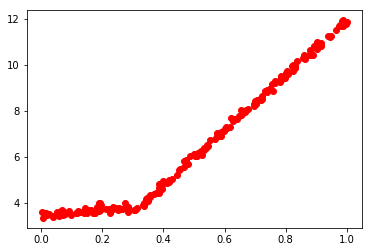

({'spInd': 0, 'spVal': 0.285477, 'left': matrix([[1.69855694e-03],
          [1.19647739e+01]]), 'right': matrix([[3.46877936],
          [1.18521743]])}, None)

In [11]:
myMat3=mat(loadDataSet('./input&code/Ch09/exp2.txt'))
mM3=createTree(myMat3,modelLeaf,modelErr,(1,10))
import matplotlib.pyplot as plt  
plt.plot(myMat3[:,0],myMat3[:,1],'ro') 
mM3,plt.show()

##  树回归与标准回归的比较
### 项目概述
前面介绍了模型树、回归树和一般的回归方法，下面测试一下哪个模型最好。

这些模型将在某个数据上进行测试，该数据涉及人的智力水平和自行车的速度的关系。当然，数据是假的。


数据格式：
```
3.000000	46.852122
23.000000	178.676107
0.000000	86.154024
6.000000	68.707614
15.000000	139.737693
```
![](./image/Ch09.TreeRegression/2.jpg)


In [12]:
# 回归树测试案例
# 为了和 modelTreeEval() 保持一致，保留两个输入参数
def regTreeEval(model, inDat):
    """
    Desc:
        对 回归树 进行预测
    Args:
        model -- 指定模型，可选值为 回归树模型 或者 模型树模型，这里为回归树
        inDat -- 输入的测试数据
    Returns:
        float(model) -- 将输入的模型数据转换为 浮点数 返回
    """
    return float(model)


# 模型树测试案例
# 对输入数据进行格式化处理，在原数据矩阵上增加第0列，元素的值都是1，
# 也就是增加偏移值，和我们之前的简单线性回归是一个套路，增加一个偏移量
def modelTreeEval(model, inDat):
    """
    Desc:
        对 模型树 进行预测
    Args:
        model -- 输入模型，可选值为 回归树模型 或者 模型树模型，这里为模型树模型
        inDat -- 输入的测试数据
    Returns:
        float(X * model) -- 将测试数据乘以 回归系数 得到一个预测值 ，转化为 浮点数 返回
    """
    n = shape(inDat)[1]
    X = mat(ones((1, n+1)))
    X[:, 1: n+1] = inDat
    # print X, model
    return float(X * model)


# 计算预测的结果
# 在给定树结构的情况下，对于单个数据点，该函数会给出一个预测值。
# modelEval是对叶节点进行预测的函数引用，指定树的类型，以便在叶节点上调用合适的模型。
# 此函数自顶向下遍历整棵树，直到命中叶节点为止，一旦到达叶节点，它就会在输入数据上
# 调用modelEval()函数，该函数的默认值为regTreeEval()
def treeForeCast(tree, inData, modelEval=regTreeEval):
    """
    Desc:
        对特定模型的树进行预测，可以是 回归树 也可以是 模型树
    Args:
        tree -- 已经训练好的树的模型
        inData -- 输入的测试数据
        modelEval -- 预测的树的模型类型，可选值为 regTreeEval（回归树） 或 modelTreeEval（模型树），默认为回归树
    Returns:
        返回预测值
    """
    if not isTree(tree):
        return modelEval(tree, inData)
    if inData[tree['spInd']] <= tree['spVal']:
        if isTree(tree['left']):
            return treeForeCast(tree['left'], inData, modelEval)
        else:
            return modelEval(tree['left'], inData)
    else:
        if isTree(tree['right']):
            return treeForeCast(tree['right'], inData, modelEval)
        else:
            return modelEval(tree['right'], inData)


# 预测结果
def createForeCast(tree, testData, modelEval=regTreeEval):
    """
    Desc:
        调用 treeForeCast ，对特定模型的树进行预测，可以是 回归树 也可以是 模型树
    Args:
        tree -- 已经训练好的树的模型
        inData -- 输入的测试数据
        modelEval -- 预测的树的模型类型，可选值为 regTreeEval（回归树） 或 modelTreeEval（模型树），默认为回归树
    Returns:
        返回预测值矩阵
    """
    m = len(testData)
    yHat = mat(zeros((m, 1)))
    # print yHat
    for i in range(m):
        yHat[i, 0] = treeForeCast(tree, mat(testData[i]), modelEval)
        # print "yHat==>", yHat[i, 0]
    return yHat

In [13]:
trainMat = mat(loadDataSet('./input&code/Ch09/bikeSpeedVsIq_train.txt'))
testMat = mat(loadDataSet('./input&code/Ch09/bikeSpeedVsIq_test.txt'))
    # # 回归树
myTree1 = createTree(trainMat, ops=(1, 20))
# print(myTree1)
yHat1 = createForeCast(myTree1, testMat[:, 0])
print("--------------\n")
    # print yHat1
    # print "ssss==>", testMat[:, 1]
print("回归树:", corrcoef(yHat1, testMat[:, 1],rowvar=0)[0, 1])

    # 模型树
myTree2 = createTree(trainMat, modelLeaf, modelErr, ops=(1, 20))
yHat2 = createForeCast(myTree2, testMat[:, 0], modelTreeEval)
# print(myTree2)
print("模型树:", corrcoef(yHat2, testMat[:, 1],rowvar=0)[0, 1])

    # 线性回归
ws, X, Y = linearSolve(trainMat)
# print(ws)
m = len(testMat[:, 0])
yHat3 = mat(zeros((m, 1)))
for i in range(shape(testMat)[0]):
    yHat3[i] = testMat[i, 0]*ws[1, 0] + ws[0, 0]
print("线性回归:", corrcoef(yHat3, testMat[:, 1],rowvar=0)[0, 1])

--------------

回归树: -0.8775461454371768
模型树: -0.962132224495778
线性回归: 0.9434684235674766


## 附加 Python 中 GUI 的使用
### 使用 Python 的 Tkinter 库创建 GUI
如果能让用户不需要任何指令就可以按照他们自己的方式来分析数据，就不需要对数据做出过多解释。其中一个能同时支持数据呈现和用户交互的方式就是构建一个图形用户界面(GUI，Graphical User Interface)，如图9-7所示。

![](./image/Ch09.TreeRegression/3.jpg)


### 用 Tkinter 创建 GUI
Python 有很多 GUI 框架，其中一个易于使用的 Tkinter，是随 Python 的标准版编译版本发布的。Tkinter 可以在 Windows、Mac OS和大多数的 Linux 平台上使用。

### 集成 Matplotlib 和 Tkinter
MatPlotlib 的构建程序包含一个前端，也就是面向用户的一些代码，如 plot() 和 scatter() 方法等。事实上，它同时创建了一个后端，用于实现绘图和不同应用之间接口。

通过改变后端可以将图像绘制在PNG、PDF、SVG等格式的文件上。下面将设置后端为 TkAgg (Agg 是一个 C++ 的库，可以从图像创建光栅图)。TkAgg可以在所选GUI框架上调用Agg，把 Agg 呈现在画布上。我们可以在Tk的GUI上放置一个画布，并用 .grid()来调整布局。

### 用treeExplore 的GUI构建的模型树示例图

![](./image/Ch09.TreeRegression/4.jpg)

In [14]:
import _tkinter
import tkinter
tkinter._test()


In [ ]:
import _tkinter
import tkinter
from tkinter import *
root=Tk() #创建一个空的tk窗口，注意弹出后不要关闭，然后继续输入下一行
myLabel=Label(root,text="hello,Tkinter!")
myLabel.grid()#输入以上两行，框内显示文字
#使程序完整：
root.mainloop()

### 这里简单介绍一下Tkinter： 
Tkinter是由很多组件（Widget）组成的，包括文本框，按钮，标签（刚才用的Label）等。其中.grid()是把组件的放入一种二维表格的布局管理器中。默认0行0列。 
下面将tk与matplotlib集成

In [16]:
from numpy import *

from tkinter import *
# import regTrees
import matplotlib

matplotlib.use('TkAgg') #设置后端TkAgg
#将TkAgg和matplotlib链接起来
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure


def reDraw(tolS, tolN):
    reDraw.f.clf()  #清空之前的图像
    reDraw.a = reDraw.f.add_subplot(111)#重新添加新图
    if chkBtnVar.get():#检查选框model tree是否被选中
        if tolN < 2: tolN = 2
        myTree = createTree(reDraw.rawDat, modelLeaf,modelErr, (tolS, tolN))
        yHat = createForeCast(myTree, reDraw.testDat, modelTreeEval)
    else:
        myTree = createTree(reDraw.rawDat, ops=(tolS, tolN))
        yHat = createForeCast(myTree, reDraw.testDat)
    reDraw.a.scatter(reDraw.rawDat[:, 0].tolist(), reDraw.rawDat[:, 1].tolist(), s=5)    # 绘制真实值
    reDraw.a.plot(reDraw.testDat, yHat, linewidth=2.0)  # 绘制预测值
    reDraw.canvas.show()


def getInputs():#获取输入
    try:#期望输入是整数
        tolN = int(tolNentry.get())
    except:#清楚错误用默认值替换
        tolN = 10
        print("enter Integer for tolN")
        tolNentry.delete(0, END)
        tolNentry.insert(0, '10')
    try:#期望输入是浮点数
        tolS = float(tolSentry.get())
    except:
        tolS = 1.0
        print("enter Float for tolS")
        tolSentry.delete(0, END)
        tolSentry.insert(0, '1.0')
    return tolN, tolS



def drawNewTree():
    tolN, tolS = getInputs()  # 从输入文本框中获取参数
    reDraw(tolS, tolN)  #绘制图
    
root = Tk()

reDraw.f = Figure(figsize=(5, 4), dpi=100)  # 创建画布
reDraw.canvas = FigureCanvasTkAgg(reDraw.f, master=root)
reDraw.canvas.show()
reDraw.canvas.get_tk_widget().grid(row=0, columnspan=3)

Label(root, text="tolN").grid(row=1, column=0)
tolNentry = Entry(root)
tolNentry.grid(row=1, column=1)
tolNentry.insert(0, '10')
Label(root, text="tolS").grid(row=2, column=0)
tolSentry = Entry(root)
tolSentry.grid(row=2, column=1)
tolSentry.insert(0, '1.0')
Button(root, text="ReDraw", command=drawNewTree).grid(row=1, column=2, rowspan=3)
chkBtnVar = IntVar()
chkBtn = Checkbutton(root, text="Model Tree", variable=chkBtnVar)
chkBtn.grid(row=3, column=0, columnspan=2)

reDraw.rawDat = mat(loadDataSet('./input&code/Ch09/sine.txt'))
reDraw.testDat = arange(min(reDraw.rawDat[:, 0]), max(reDraw.rawDat[:, 0]), 0.01)
reDraw(1.0, 10)

root.mainloop()

C:\Users\x1c\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\x1c\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\x1c\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\x1c\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\x1c\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\x1c\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\x1c\Anaconda3\lib\s

## 总结 
数据集中会包含一些复杂的相互关系，使输入数据和目标变量之间存在非线性的关系。对于这种复杂关系的建模，可以采用树模型来对预测进行分段，包括分段常数（回归树）和分段直线（模型树）。

回归分类树CART算法用于构建二元树对离散/连续型数据进行切分。根据使用的不同误差准则方法，可以通过CART算法构建模型树和回归树。但是该算法构建的树倾向于过拟合，可采用剪枝的方法解决。剪枝方法分为预剪枝（在树的构建过程中人工设置参数预防过拟合）和后剪枝（树构建完毕进行删除/合并分支）。

Tkinter是python的一个最常用的GUI工具包，结合matplotlib可以构建更强大的GUI。